### Yolo v3 다운로드 및 설치

In [1]:
!git clone https://github.com/ultralytics/yolov3
!cd yolov3; pip install -qr requirements.txt

Cloning into 'yolov3'...
remote: Enumerating objects: 9976, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 9976 (delta 3), reused 8 (delta 2), pack-reused 9964
Receiving objects: 100% (9976/9976), 9.32 MiB | 13.46 MiB/s, done.
Resolving deltas: 100% (6723/6723), done.
     |████████████████████████████████| 596 kB 7.3 MB/s 
     |████████████████████████████████| 1.7 MB 44.1 MB/s 
     |████████████████████████████████| 144 kB 58.7 MB/s 
     |████████████████████████████████| 181 kB 38.8 MB/s 
     |████████████████████████████████| 63 kB 1.6 MB/s 


In [2]:
!wget -O incredibles.zip https://github.com/chulminkw/DLCV/blob/master/incredibles.zip?raw=true
!mkdir /content/incredibles
!unzip incredibles.zip -d /content/incredibles

--2022-03-08 07:54:53--  https://github.com/chulminkw/DLCV/blob/master/incredibles.zip?raw=true
Resolving github.com (github.com)... 192.30.255.113
Connecting to github.com (github.com)|192.30.255.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/chulminkw/DLCV/raw/master/incredibles.zip [following]
--2022-03-08 07:54:53--  https://github.com/chulminkw/DLCV/raw/master/incredibles.zip
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/chulminkw/DLCV/master/incredibles.zip [following]
--2022-03-08 07:54:53--  https://raw.githubusercontent.com/chulminkw/DLCV/master/incredibles.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
L

### Dataset용 yaml 파일을 생성하고 학습 수행


In [3]:
!wget -O /content/incredibles/incredibles.yaml https://raw.githubusercontent.com/chulminkw/DLCV/master/data/util/incredibles.yaml

--2022-03-08 07:58:26--  https://raw.githubusercontent.com/chulminkw/DLCV/master/data/util/incredibles.yaml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 190 [text/plain]
Saving to: ‘/content/incredibles/incredibles.yaml’

/content/incredible 100%[===================>]     190  --.-KB/s    in 0s      

2022-03-08 07:58:26 (11.2 MB/s) - ‘/content/incredibles/incredibles.yaml’ saved [190/190]



In [4]:
# Google Drive 접근을 위한 Mount 적용. 
import os, sys 
from google.colab import drive 

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [5]:
# soft link로 Google Drive Directory 연결. 
!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive

# Google Drive 밑에 Directory 생성. 이미 생성 되어 있을 시 오류 발생. 
!mkdir "/mydrive/ultra_workdir"

 Colab_Notebooks  'My Drive'	  Pictures
 Documents	   pet_work_dir   ultra_workdir
mkdir: cannot create directory ‘/mydrive/ultra_workdir’: File exists


In [6]:
###  batch size는 8로 정할것. 16으로 설정시 성능이 좋아지지 않음. epoch는 150번으로 설정.    
### 울트라리틱스는 epoch를 많이 해야 성능이 잘 나오는 편 

!cd /content/yolov3; python train.py --img 640 --batch 8 --epochs 150 --data /content/incredibles/incredibles.yaml --weights yolov3.pt \
                                     --project=/mydrive/ultra_workdir --name incredibles --exist-ok 

wandb: (1) Create a W&B account
wandb: (2) Use an existing W&B account
wandb: (3) Don't visualize my results
wandb: Enter your choice: (30 second timeout) 2
wandb: You chose 'Use an existing W&B account'
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit: 
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
train: weights=yolov3.pt, cfg=, data=/content/incredibles/incredibles.yaml, hyp=data/hyps/hyp.scratch.yaml, epochs=150, batch_size=8, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, adam=False, sync_bn=False, workers=8, project=/mydrive/ultra_workdir, name=incredibles, exist_ok=True, quad=False, linear_lr=False, label_smoothing=0.0, patience=100, freeze=0, save_period=-1, local_rank=-1, entity=None, upload_dataset=False

### 단일 이미지 및 Video inference 수행 

In [7]:
# image 파일 inference 
!cd /content/yolov3;python detect.py --source /content/incredibles/images/train/incredible_028.jpg \
                            --weights /mydrive/ultra_workdir/incredibles/weights/best.pt --conf 0.3 \
                            --project=/content/data/output --name=run_image --exist-ok --line-thickness 2

detect: weights=['/mydrive/ultra_workdir/incredibles/weights/best.pt'], source=/content/incredibles/images/train/incredible_028.jpg, imgsz=[640, 640], conf_thres=0.3, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=/content/data/output, name=run_image, exist_ok=True, line_thickness=2, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv3 🚀 v9.6.0-7-g0519223 torch 1.10.0+cu111 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)

Fusing layers... 
Model Summary: 261 layers, 61513585 parameters, 0 gradients, 154.8 GFLOPs
image 1/1 /content/incredibles/images/train/incredible_028.jpg: 288x640 1 mr_incredible, 1 elastic_girl, 1 dash, 1 violet, Done. (0.020s)
Speed: 0.4ms pre-process, 20.1ms inference, 1.8ms NMS per image at shape (1, 3, 640, 640)
Results saved to /content/data/output/run_image


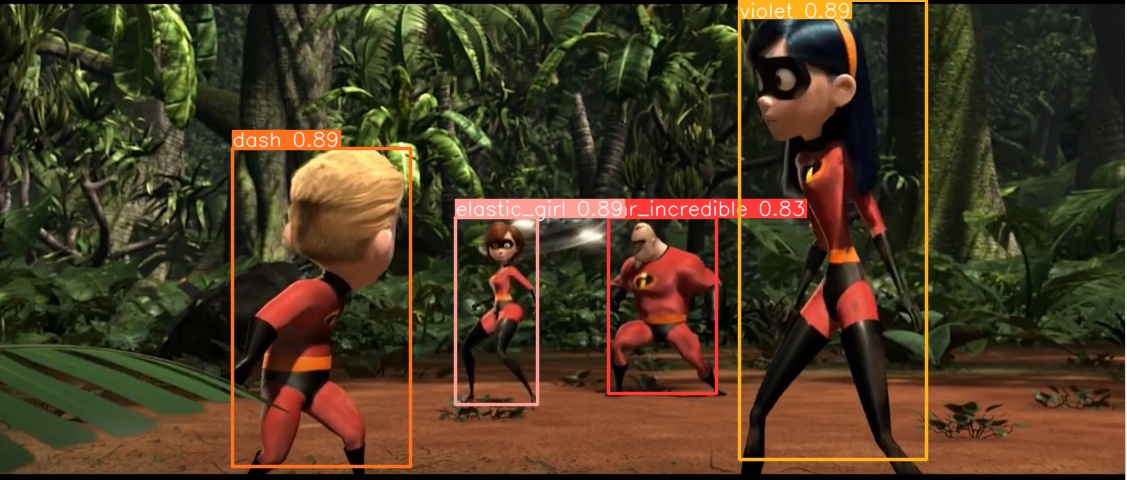

In [8]:
from IPython.display import Image, clear_output 

Image(filename='/content/data/output/run_image/incredible_028.jpg', width=800)

In [9]:
!wget -O /content/incredibles/incredibles.mp4 https://github.com/chulminkw/DLCV/blob/master/data/video/incredibles.mp4?raw=true

--2022-03-08 08:45:16--  https://github.com/chulminkw/DLCV/blob/master/data/video/incredibles.mp4?raw=true
Resolving github.com (github.com)... 192.30.255.112
Connecting to github.com (github.com)|192.30.255.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/chulminkw/DLCV/raw/master/data/video/incredibles.mp4 [following]
--2022-03-08 08:45:16--  https://github.com/chulminkw/DLCV/raw/master/data/video/incredibles.mp4
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/chulminkw/DLCV/master/data/video/incredibles.mp4 [following]
--2022-03-08 08:45:16--  https://raw.githubusercontent.com/chulminkw/DLCV/master/data/video/incredibles.mp4
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... conn

In [10]:
!cd /content/yolov3; python detect.py --source /content/incredibles/incredibles.mp4 \
                            --weights /mydrive/ultra_workdir/incredibles/weights/best.pt --conf 0.3 \
                            --project=/content/data/output --name=run_image --exist-ok --line-thickness 2

detect: weights=['/mydrive/ultra_workdir/incredibles/weights/best.pt'], source=/content/incredibles/incredibles.mp4, imgsz=[640, 640], conf_thres=0.3, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=/content/data/output, name=run_image, exist_ok=True, line_thickness=2, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv3 🚀 v9.6.0-7-g0519223 torch 1.10.0+cu111 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)

Fusing layers... 
Model Summary: 261 layers, 61513585 parameters, 0 gradients, 154.8 GFLOPs
video 1/1 (1/589) /content/incredibles/incredibles.mp4: 288x640 1 mr_incredible, 1 elastic_girl, Done. (0.020s)
video 1/1 (2/589) /content/incredibles/incredibles.mp4: 288x640 1 mr_incredible, 1 elastic_girl, Done. (0.018s)
video 1/1 (3/589) /content/incredibles/incredibles.mp4: 288x640 1 mr_incredible, 1 elastic_girl, Done. (0.017s